<center><h1>Diving into Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

### About the dataset

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.


* $total\_bill =$ Total bill (cost of the meal), including tax, in US dollars.
* $tip$ = Tip (gratuity) in US dollars.
* $sex$ = Sex of person paying for the meal.
* $smoker$ = Smoker in party?
* $day$ = Day of the week.
* $time$ = Time of the meal.
* $size$ = Size of the party

### Load the dataset

In [2]:
tips = pd.read_csv('tips.csv')  # Loaded in a Pandas DataFrame
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,12.54,2.50,Male,No,Sun,Dinner,2
1,10.29,2.60,Female,No,Sun,Dinner,2
2,34.81,5.20,Female,No,Sun,Dinner,4
3,9.94,1.56,Male,No,Sun,Dinner,2
4,25.56,4.34,Male,No,Sun,Dinner,4


In [3]:
tips.shape

(194, 7)

In [4]:
tips2 = pd.read_csv('tips2.csv')

In [5]:
tips2.shape

(50, 7)

In [6]:
mrg = tips.merge(tips2,how='left',on='smoker')

In [7]:
mrg

,total_bill_x,tip_x,sex_x,smoker,day_x,time_x,size_x,total_bill_y,tip_y,sex_y,day_y,time_y,size_y
0,12.54,2.5,Male,No,Sun,Dinner,2,16.99,1.01,Female,Sun,Dinner,2.0
1,12.54,2.5,Male,No,Sun,Dinner,2,10.34,1.66,Male,Sun,Dinner,3.0
2,12.54,2.5,Male,No,Sun,Dinner,2,21.01,3.50,Male,Sun,Dinner,3.0
3,12.54,2.5,Male,No,Sun,Dinner,2,23.68,3.31,Male,Sun,Dinner,2.0
4,12.54,2.5,Male,No,Sun,Dinner,2,24.59,3.61,Female,Sun,Dinner,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5138,18.78,3.0,Female,No,Thur,Dinner,2,18.29,3.00,Male,Sun,Dinner,2.0
5139,18.78,3.0,Female,No,Thur,Dinner,2,22.23,5.00,Male,Sun,Dinner,2.0
5140,18.78,3.0,Female,No,Thur,Dinner,2,32.40,6.00,Male,Sun,Dinner,4.0
5141,18.78,3.0,Female,No,Thur,Dinner,2,28.55,2.05,Male,Sun,Dinner,3.0


In [8]:
mrg.shape

(5143, 13)

In [9]:
tips.groupby("day").total_bill.mean()

day
Fri     17.151579
Sat     20.839692
Sun     22.696250
Thur    17.682742
Name: total_bill, dtype: float64

<a id='count'></a>
## Count Plot

A countplot is kind of like a bar plot for some categorical variable. It simply shows the number of occurrences of a certain type of category.

**Documentation:** https://seaborn.pydata.org/generated/seaborn.countplot.html

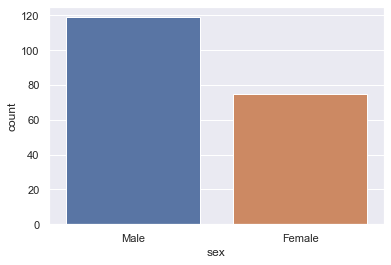

In [10]:
plot = sns.countplot(tips["sex"])

# plot.figure.savefig("file.png", dpi=300) # To export your plot

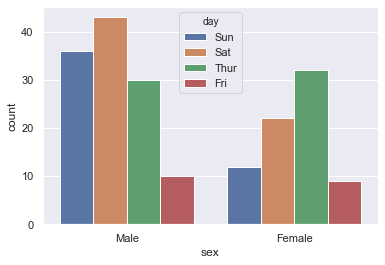

In [11]:
plot = sns.countplot(tips["sex"], 
                     hue=tips["day"])

# In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding.

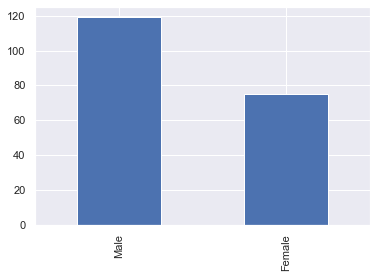

In [12]:
# Using pandas

plot = tips["sex"].value_counts().plot(kind="bar")

<a id='bar'></a>
## Bar Plot

A barplot (or barchart) is one of the most common type of plot. It shows the **relationship between a numerical variable and a categorical variable.** 

**For example,** you can display the **average total_bill** for different **days** using bar chart. 

**Documentation:** https://seaborn.pydata.org/generated/seaborn.barplot.html

Barcharts are often confounded with histograms, which is highly different. (It has only a numerical variable as input and shows its distribution). 

A common mistake is to use barplots to represent the average value of each group. If you have several values per group, showing only the average dissimulate a part of the information. At least, you should show the number of observation per group and the confidence interval of each group. 

**Last tip:** ordering the bars often makes the chart more informative.

**Learn Detail About Confidence Interval (CI):** https://www.mathsisfun.com/data/confidence-interval.html

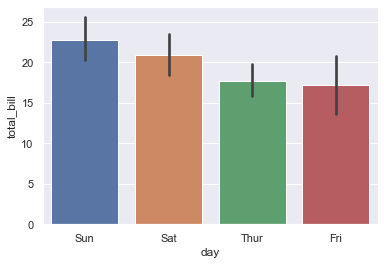

In [13]:
plot = sns.barplot(x=tips["day"], 
                   y=tips["total_bill"])

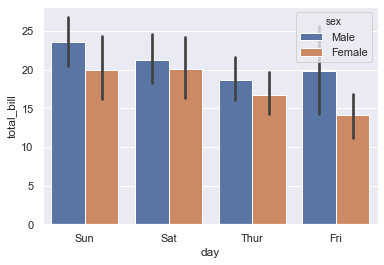

In [14]:
plot = sns.barplot(x=tips["day"], 
                   y=tips["total_bill"], 
                   hue=tips["sex"])

<a id='stack'></a>
## Stacked Bar Plot

If you have groups and subgroups, you probably want to display the subgroups values in a grouped barplot or a stacked barplot. In the first case, subgroups are displayed one beside each other, in the second case subgroups are displayed on top of each other.

A stacked bar chart is a good visualization that shows how the frequencies are spread between the two categorical variables.

Seaborn doesn't support stacked bar chart. However, we can use Pandas or Matlotlib.

**Documentation:** https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/bar_stacked.html

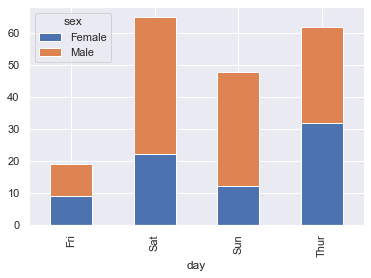

In [15]:
plot = (tips
        .groupby(['day', 'sex'])
        .size()
        .unstack()
        .plot
        .bar(stacked=True))

<a id='pie'></a>
## Pie Charts

Pie chart is probably one of the most common type of chart. It is a circular graphic which is divided into slices to illustrate numerical proportion. The point of a pie chart is to show the relationship of parts out of a whole. 

**For Example:** Plot the pie slices for the **sex** column.

**Warning!** Pie chart is easily the worst way to convey information ever developed in the history of data visualization. Thus, it must be avoided and replaced with barplot most of the time. Indeed, it is really difficult for a human to make the difference between the size of similar slices.

Seaborn doesn't support pie chart. However, we can use Pandas or Matlotlib.

**Documentation:** https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html

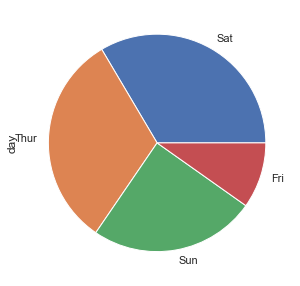

In [16]:
pie_data = tips['day'].value_counts()

plot = pie_data.plot(kind='pie',
                     subplots=True,
                     figsize=(5,5))

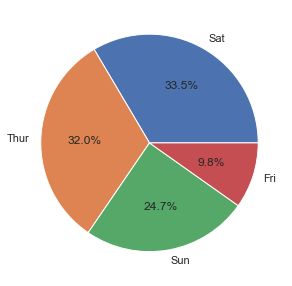

In [17]:
pie_data = tips['day'].value_counts()

plt.figure(figsize=(5,5))

plt.pie(pie_data.values, 
        labels=pie_data.index,
        autopct='%.1f%%')

plt.show()

<a id='scatter'></a>
## Scatter Plot

A Scatterplot displays the value of 2 sets of data on 2 dimensions. Each dot represents an observation. The position on the X (horizontal) and Y (vertical) axis represents the values of the 2 variables. 

It is really useful to study the relationship between both variables. It is common to provide even more information using colors or shapes (to show groups, or a third variable).

**Documentation:** https://seaborn.pydata.org/generated/seaborn.scatterplot.html

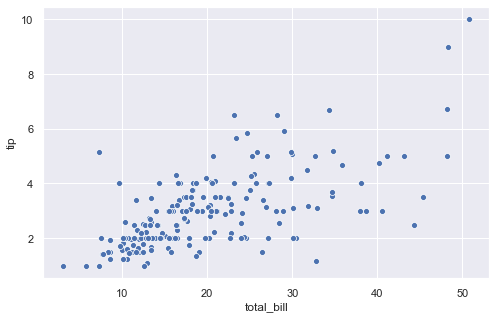

In [18]:
plt.figure(figsize=(8,5))

plot = sns.scatterplot(x=tips["total_bill"],
                       y=tips["tip"])

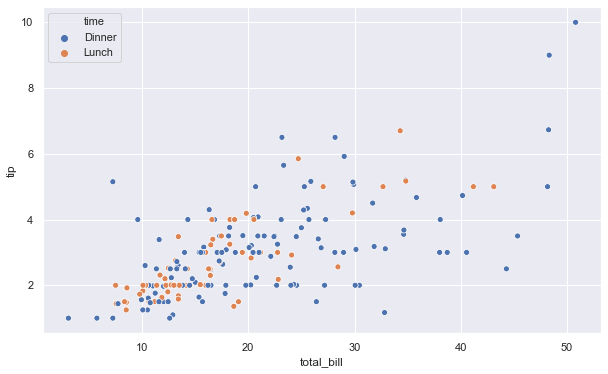

In [19]:
plt.figure(figsize=(10,6))

plot = sns.scatterplot(x=tips["total_bill"],
                       y=tips["tip"],
                       hue=tips["time"])

<a id='line'></a>
## Line Plot

A line chart or line graph is a type of chart which displays information as a series of data points called ‘markers’ connected by straight line segments. It is similar to a scatter plot except that the measurement points are ordered (typically by their x-axis value) and joined with straight line segments.

Line plots are used to track trends, and changes over short and long periods of time.

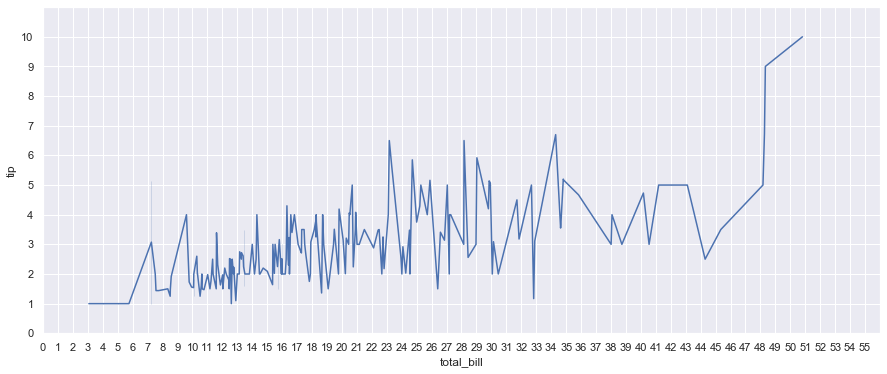

In [20]:
plt.figure(figsize=(15,6))

plot = sns.lineplot(x=tips["total_bill"],
                    y=tips["tip"])
plot.set_xlim(0,56)
plot.set_xticks(range(0,56))

plot.set_ylim(0,11)
plot.set_yticks(range(0,11));

<a id='histograms'></a>
## Histograms

A histogram is a plot that lets you discover, and show, the underlying frequency distribution (shape) of a set of continuous data. This allows the inspection of the data for its underlying distribution (e.g., normal distribution), outliers, skewness, etc.

**Documentation:** https://seaborn.pydata.org/generated/seaborn.distplot.html

**Learn about Normal Distribution:** https://www.mathsisfun.com/data/standard-normal-distribution.html

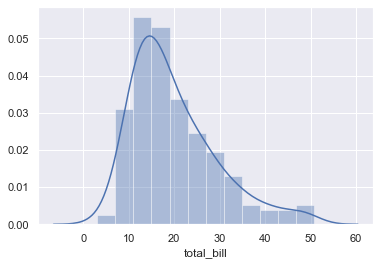

In [21]:
plot = sns.distplot(tips["total_bill"],
                    hist=True)

<a id='joint'></a>
## Joint Plot

Jointplot (aka marginal plot) shows the relationship or correlation between the two variables along with histograms if the individual coordinates.

**Documentation:** https://seaborn.pydata.org/generated/seaborn.jointplot.html

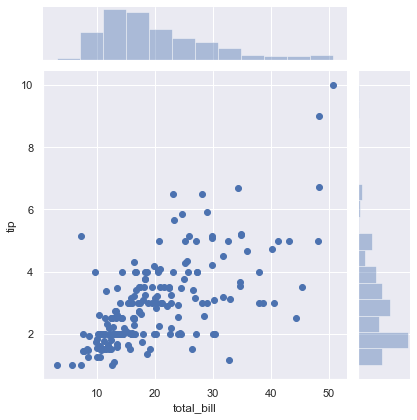

In [22]:
plot = sns.jointplot(x=tips["total_bill"],
                     y=tips["tip"])

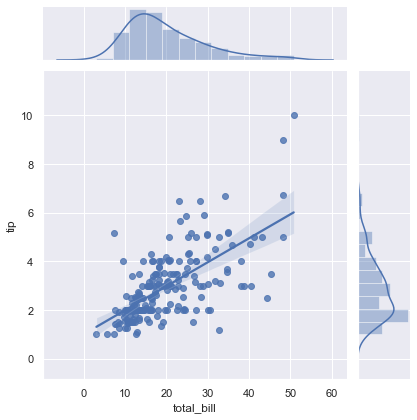

In [23]:
plot = sns.jointplot(x=tips["total_bill"],
                     y=tips["tip"],
                     kind='reg')

<a id='box'></a>
## Box Plot

Boxplot (aka whisker plot) is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data. The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. 

Note that boxplot hide the number of values existing behind the variable. Thus, it is highly advised to print the number of observation, add unique observation with jitter or use a violinplot if you have many observations.

**Documentation:** https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Learn about Quartiles:** https://www.mathsisfun.com/data/quartiles.html

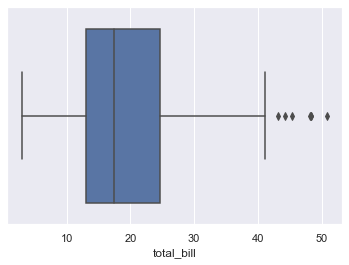

In [24]:
plot = sns.boxplot(tips["total_bill"])

Draw a vertical boxplot grouped by a categorical variable:

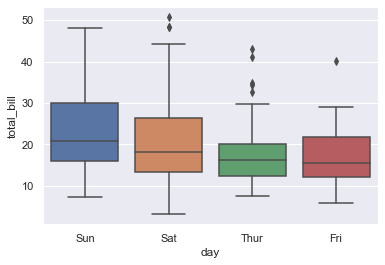

In [25]:
plot = sns.boxplot(x=tips["day"],
                   y=tips["total_bill"])

Useing stripplot() to show the datapoints on top of the boxes:

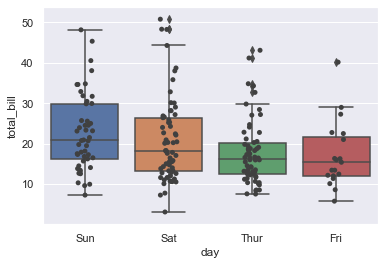

In [26]:
plot = sns.boxplot(x=tips["day"],
                   y=tips["total_bill"])

plot = sns.stripplot(x=tips["day"],
                     y=tips["total_bill"],
                     color=".25")

<a id='violin'></a>
## Violin Plot

Violin plots allow to visualize the distribution and the probability density of a numeric variable for one or several groups. It is really close from a boxplot, but allows a deeper understanding of the density. 

Violins are particularly adapted when the amount of data is huge and showing individual observations gets impossible.

Violinplots are a really convenient way to show the data and would probably deserve more attention compared to boxplot that can sometimes hide features of the data.

**Documentation:** https://seaborn.pydata.org/generated/seaborn.violinplot.html

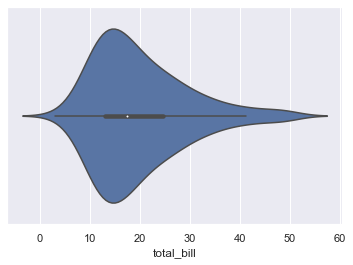

In [27]:
plot = sns.violinplot(x=tips["total_bill"])

Draw a vertical violinplot grouped by a categorical variable:

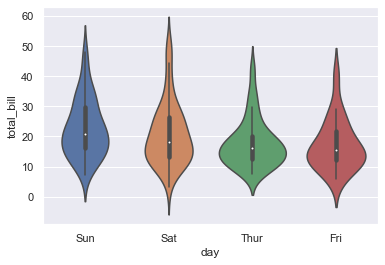

In [28]:
plot = sns.violinplot(x=tips["day"],
                      y=tips["total_bill"])

<a id='heatmap'></a>
## Heatmap

Heatmaps visualise data through variations in colouring. When applied to a tabular format, Heatmaps are useful for cross-examining multivariate data, through placing variables in the rows and columns and colouring the cells within the table. Heatmaps are good for showing variance across multiple variables, revealing any patterns, displaying whether any variables are similar to each other, and for detecting if any correlations exist in-between them.

**Documentation:** https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Load data

In [29]:
flights = pd.read_csv("flights.csv")
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [30]:
flights_pivot = flights.pivot("month", "year", "passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
April,129,135,163,181,235,227,269,313,348,348,396,461
August,148,170,199,242,272,293,347,405,467,505,559,606
December,118,140,166,194,201,229,278,306,336,337,405,432
February,118,126,150,180,196,188,233,277,301,318,342,391
January,112,115,145,171,196,204,242,284,315,340,360,417
July,148,170,199,230,264,302,364,413,465,491,548,622
June,135,149,178,218,243,264,315,374,422,435,472,535
March,132,141,178,193,236,235,267,317,356,362,406,419
May,121,125,172,183,229,234,270,318,355,363,420,472


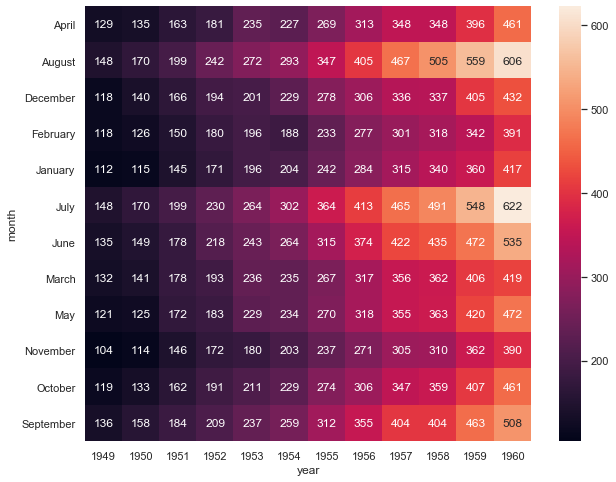

In [31]:
plt.figure(figsize=(10,8))
plot = sns.heatmap(flights_pivot, annot=True, fmt="d")

Here, all the rows are one category (labels displayed on the left or right side) and all the columns are another category (labels displayed on the top or bottom). The individual rows and columns are divided into the subcategories, which all match up with each other in a matrix. The cells contained within the table either contain colour-coded categorical data or numerical data, that is based on a colour scale. The data contained within a cell is based on the relationship between the two variables in the connecting row and column.

<a id='correlation'></a>
## Correlation Matrix

A correlation matrix is simply a table which displays the correlation coefficients for different variables. The matrix depicts the correlation between all the possible pairs of values in a table. It is a powerful tool to summarize a large dataset and to identify and visualize patterns in the given data.

A correlation matrix consists of rows and columns that show the variables. Each cell in a table contains the correlation coefficient. The most commonly used correlation coefficient is Person correlation coefficient.

In addition, the correlation matrix is frequently utilized in conjunction with other types of statistical analysis. For instance, it may be helpful in the analysis of multiple linear regression models. Remember that the models contain several independent variables. In multiple linear regression, the correlation matrix determines the correlation coefficients between the independent variables in a model.

**Documentation:** https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [32]:
corr_mtx = tips.corr()
corr_mtx

,total_bill,tip,size
total_bill,1.000000,0.657791,0.607229
tip,0.657791,1.000000,0.503630
size,0.607229,0.503630,1.000000


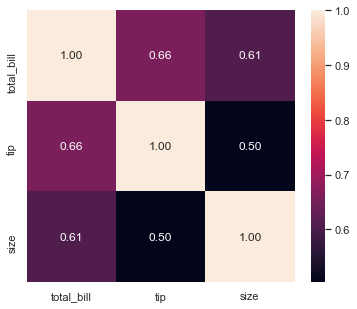

In [33]:
plt.figure(figsize=(6,5))
plot = sns.heatmap(corr_mtx, annot=True, fmt=".2f")

Using a mask to plot only part of a matrix.

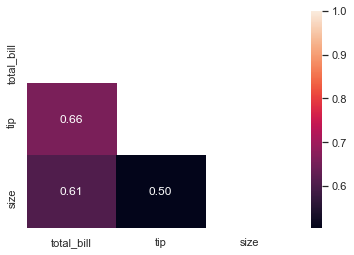

In [34]:
mask = np.zeros_like(corr_mtx)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plot = sns.heatmap(corr_mtx, mask=mask, annot=True, fmt=".2f")

<a id='resources'></a>
## Resources

* **Seaborn Example gallery:** https://seaborn.pydata.org/examples/index.html
* **Seaborn API reference:** https://seaborn.pydata.org/api.html
* **Matplotlib Gallery:** https://matplotlib.org/3.1.0/gallery/index.html
* **Learn the Basic Statistics & Probability:** https://www.mathsisfun.com/data/